In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

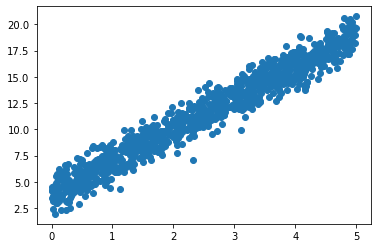

In [2]:
N = 1000
k = 3.0
b = 4.0
x = 5 * np.random.rand(N, 1)
y = k*x + b + np.random.randn(N, 1)
plt.plot(x, y, 'o')
x_b = np.concatenate((np.ones((N,1)), x), axis=1)

In [3]:
class LinearReg:
    def __init__(self, lr=0.01):
        self.lr = lr 
        self.gd_modes = ['full', 'batch', 'stochastic']
    
    def fit(self, X, y, epochs=10, batch_size=1, gradient_descent_mode='full'):
        assert gradient_descent_mode in self.gd_modes
        
        if gradient_descent_mode == 'full':
            batch_size = X.shape[0]
        elif gradient_descent_mode == 'stochastic':
            batch_size = 1
        else:
            batch_size = batch_size
        
        self.thetha = np.random.randn(X.shape[1], 1)
        
        for ep in tqdm(range(epochs)):
            n_samples = X.shape[0]
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            for start in range(0, n_samples, batch_size):
                end = min(start + batch_size, n_samples)
                batch_idx = indices[start:end]
                grad = self._calculate_grad(X[batch_idx], y[batch_idx])
                self.thetha -= self.lr * grad
    
    def _calculate_grad(self, X, y):
        grad = 2/X.shape[0] * X.T.dot(X.dot(self.thetha) - y)
        return grad
    
    def predict(self, X):
        return X @ self.thetha

In [4]:
%%time
model_batch = LinearReg(lr=0.01)
model_batch.fit(x_b, y, batch_size=100, epochs=1000, gradient_descent_mode='batch')
model_batch.thetha

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6510.84it/s]

Wall time: 158 ms


array([[4.00783383],
       [2.99304551]])

In [5]:
%%time
model_full = LinearReg(lr=0.1)
model_full.fit(x_b, y, epochs=1000, gradient_descent_mode='full')
model_full.thetha

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 12080.44it/s]

Wall time: 83.8 ms


array([[4.01064789],
       [3.00181819]])

In [6]:
%%time
model_stoc = LinearReg(lr=0.0001)
model_stoc.fit(x_b, y, epochs=1000, gradient_descent_mode='stochastic')
model_stoc.thetha

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 83.19it/s]

Wall time: 12 s


array([[4.01117044],
       [3.00330319]])

In [7]:
%%time
omega = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
omega

Wall time: 0 ns


array([[4.01064789],
       [3.00181819]])

In [ ]:
print('epochs=1000')
pd.DataFrame([['stochastic', 635, 6980],['batch', 16, 130], ['full', 12, 38], ['analytic', 1, 1]], columns=['method', 'time(ms) N = 100', 'time(ms) N = 1000'])